# Exploratoration of the Spotify API
### Creation of the Client

In [2]:
from spotipy.oauth2 import SpotifyOAuth
from spotipy import Spotify
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv


In [3]:

#For getting the environment variables
load_dotenv()
song_link = "https://open.spotify.com/track/2NZUXUA8gGmXXw5MayF63k?si=bdfd71ed4c504192"

SPOTIPY_CLIENT_ID = os.getenv('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET =os.getenv('SPOTIPY_CLIENT_SECRET')
SPOTIPY_REDIRECT_URI = os.getenv('SPOTIPY_REDIRECT_URI')
scope = "user-library-read"

sp = Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=SPOTIPY_CLIENT_ID,
                                               client_secret=SPOTIPY_CLIENT_SECRET))

In [4]:
results_dict = sp.playlist_tracks("https://open.spotify.com/playlist/2RuXhLrgWt5odD2RUtYItC?si=108b9c68f7204c08")
tracks_data = []
name_tracks = []
for result in results_dict["items"]:
    track_data = sp.audio_features(result["track"]["id"])[0]  # Get audio features for each track
    name_tracks.append(result["track"]["name"])
    tracks_data.append(track_data)

# Create a DataFrame with keys as indices
df = pd.DataFrame(tracks_data)
df = df.assign(name=name_tracks)


In [8]:
results_dict = sp.playlist_tracks("https://open.spotify.com/playlist/2RuXhLrgWt5odD2RUtYItC?si=108b9c68f7204c08")
tracks_data = []
name_tracks = []
album_names = []  # New list to store album names

for result in results_dict["items"]:
    track_data = sp.audio_features(result["track"]["id"])[0]  # Get audio features

    # Get track information
    track = sp.track(result["track"]["id"])
    album_name = track["album"]["name"]

    name_tracks.append(result["track"]["name"])
    tracks_data.append(track_data)
    album_names.append(album_name)

# Create a DataFrame with keys as indices and album information
df = pd.DataFrame(tracks_data)
df = df.assign(name=name_tracks, album=album_names)


/var/folders/jd/3f08_zdj5kj5ql0b3h3mj8g40000gn/T/ipykernel_32808/2309049952.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(y='valence', x='album', data=df_grouped, jitter=True, size=5, alpha=0.7, palette='Set1')


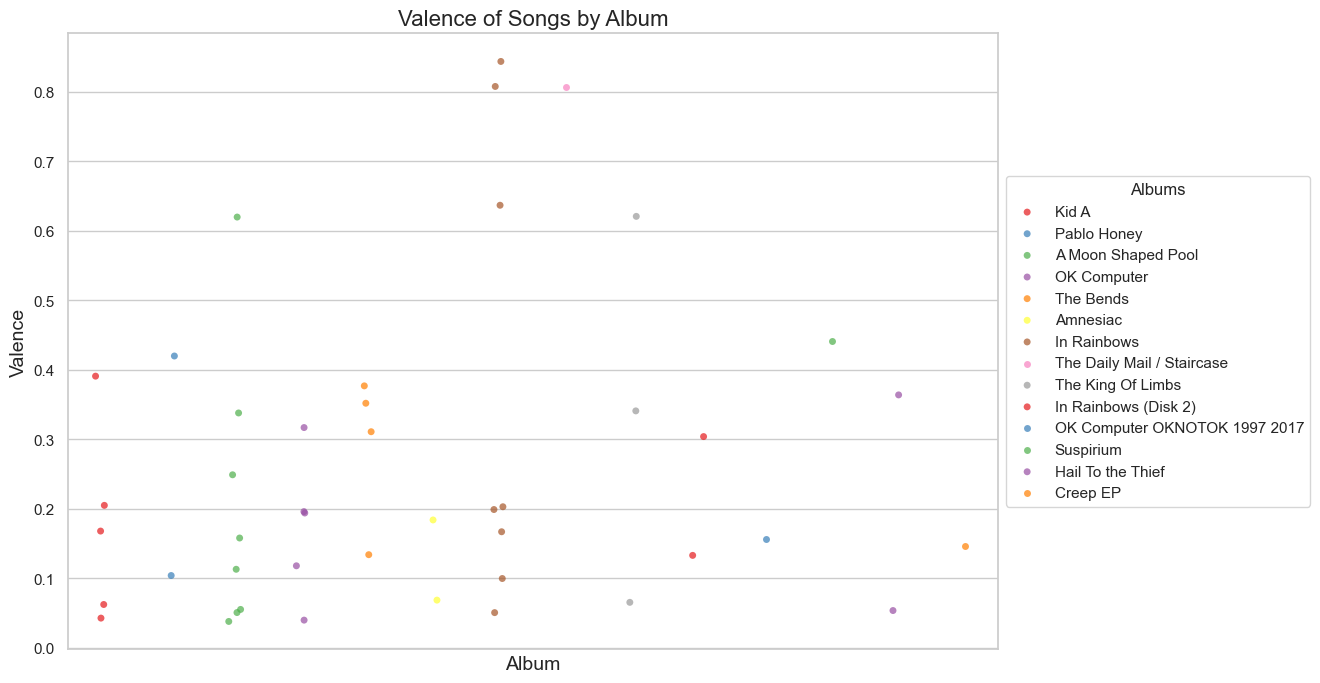

In [26]:
df_grouped = df[['valence', 'album']]

# Set plot style
sns.set(style="whitegrid")

# Create dot plot# Create the figure and axis
plt.figure(figsize=(12, 8))
ax = sns.stripplot(y='valence', x='album', data=df_grouped, jitter=True, size=5, alpha=0.7, palette='Set1')

# Customize x-tick labels (hide them) and use shorter labels or none
ax.set_xticks([])

# Create a legend
handles, labels = ax.get_legend_handles_labels()
album_labels = df['album'].unique()
legend = plt.legend(title='Albums', labels=album_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Customize plot
plt.title('Valence of Songs by Album', fontsize=16)
plt.ylabel('Valence', fontsize=14)
plt.xlabel('Album', fontsize=14)

# Show plot
plt.show()